>Q.1: Import data and check null values, check column info and the descriptive statistics of the data.

In [1]:
import pandas as pd

# Importing the data
df = pd.read_csv("transaction_anomalies_dataset.csv")

# Checking for null values
null_values = df.isnull().sum()
print("Null Values:\n", null_values)

# Displaying column information
print("\nColumn Information:\n")
print(df.info())

# Descriptive statistics of the data
print("\nDescriptive Statistics:\n", df.describe())


Null Values:
 Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

Column Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-

>Q.2: Check distribution of transactions amount in the data.

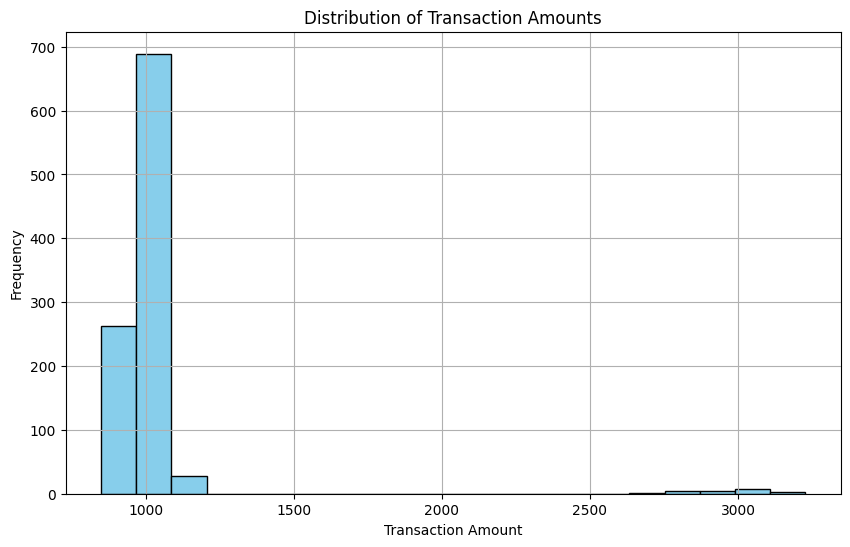

In [4]:
import matplotlib.pyplot as plt

# Plot the distribution of transaction amounts
plt.figure(figsize=(10, 6))
plt.hist(df['Transaction_Amount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


>Q.3: Check distribution of transactions amount by account type.

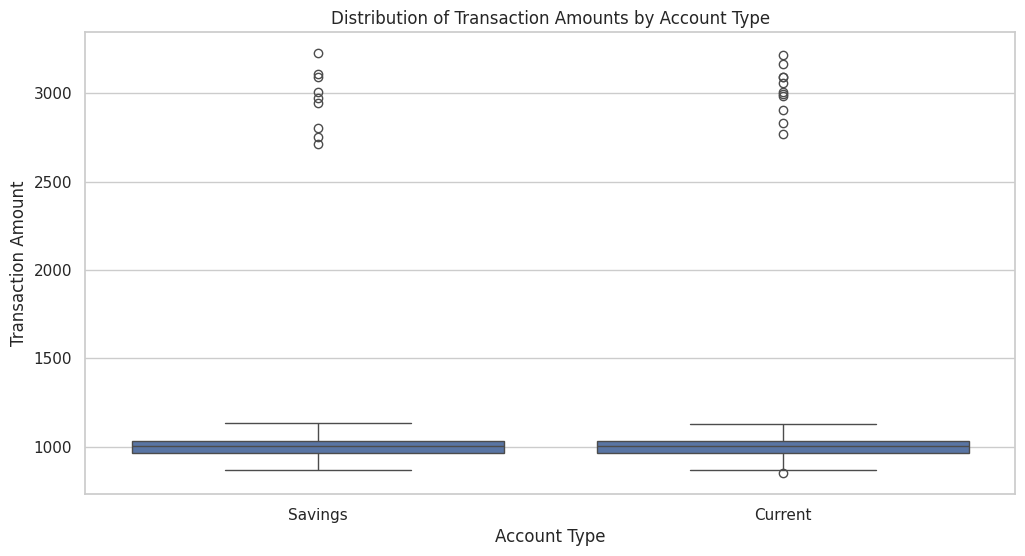

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the seaborn plots
sns.set(style="whitegrid")

# Plot box plots for transaction amounts by account type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Account_Type', y='Transaction_Amount')
plt.title('Distribution of Transaction Amounts by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.show()


>Q.4: Check the average transaction amount by age.

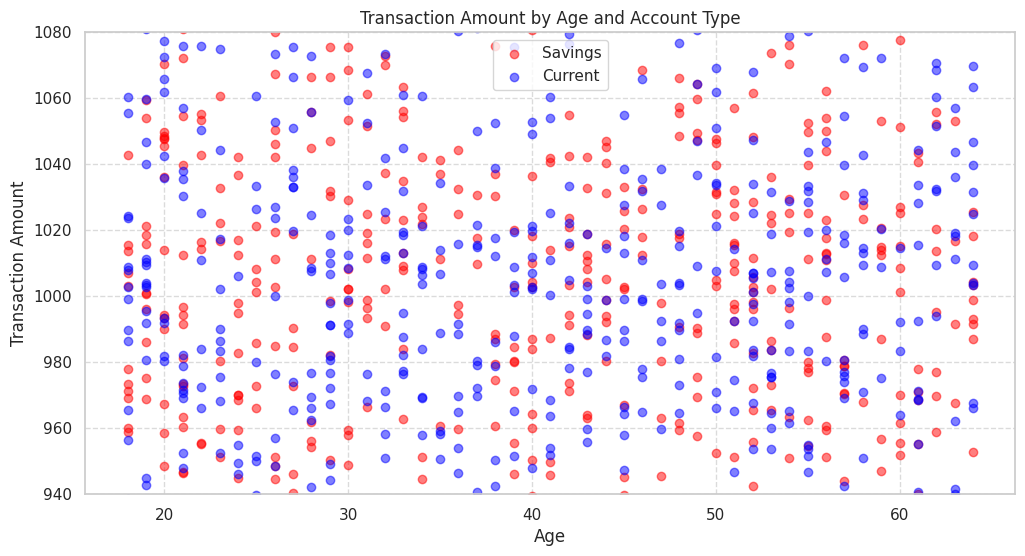

In [18]:
import matplotlib.pyplot as plt

# Separate data for different account types
savings_data = df[df['Account_Type'] == 'Savings']
current_data = df[df['Account_Type'] == 'Current']

# Plotting
plt.figure(figsize=(12, 6))

plt.scatter(savings_data['Age'], savings_data['Transaction_Amount'], color='red', label='Savings', alpha=0.5)
plt.scatter(current_data['Age'], current_data['Transaction_Amount'], color='blue', label='Current', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by Age and Account Type')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Setting y-axis limits and ticks
plt.ylim(940, 1080)

plt.show()


>Q.5: Check the count of transactions by day of the week.

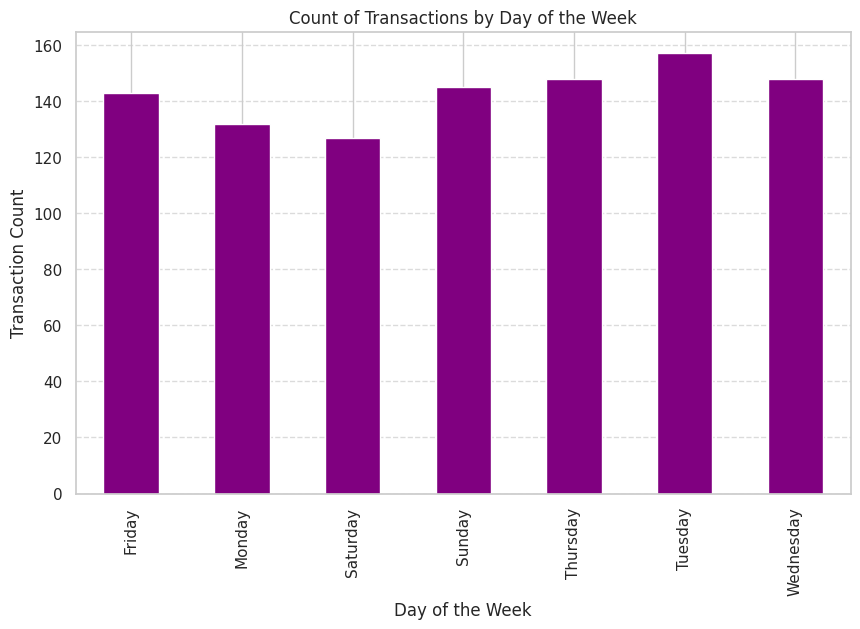

In [22]:
import matplotlib.pyplot as plt

# Grouping the data by day of the week and counting the transactions
transactions_by_day = df['Day_of_Week'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
transactions_by_day.plot(kind='bar', color='purple')
plt.title('Count of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


>Q.6: Check the correlation between all the columns in the data.

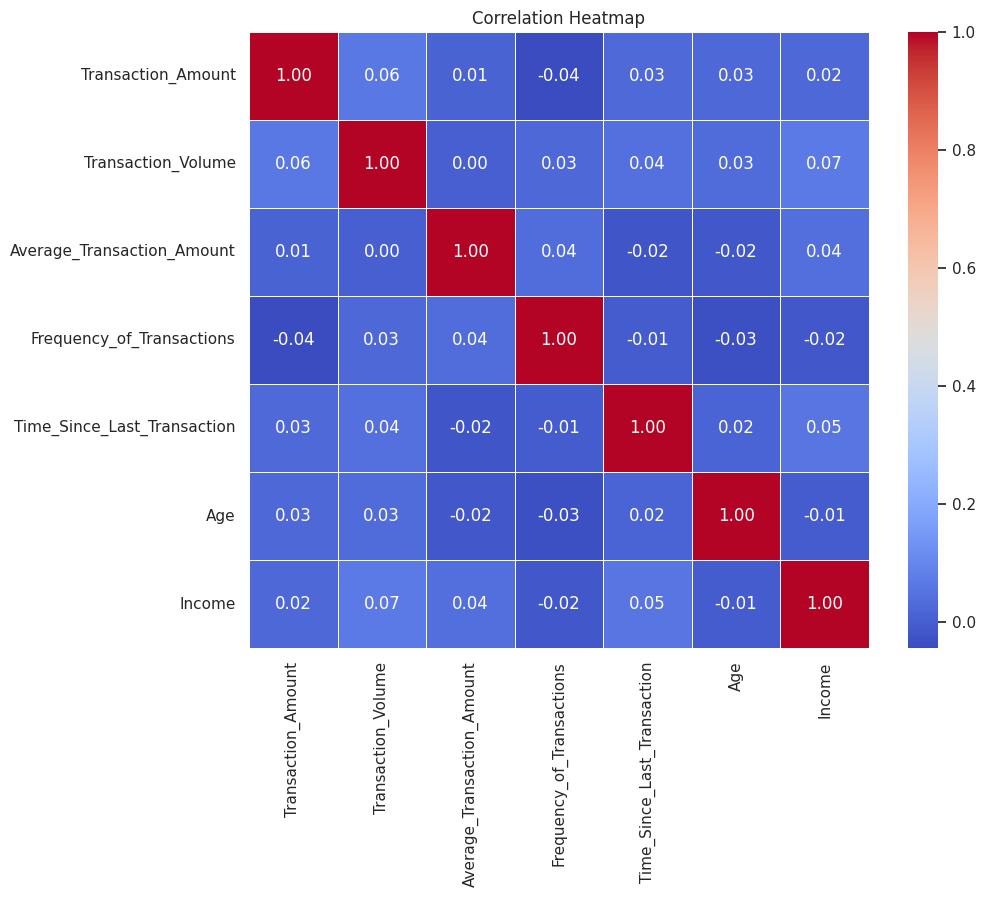

In [27]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


>Q.7: Visualize anomalies in the data.

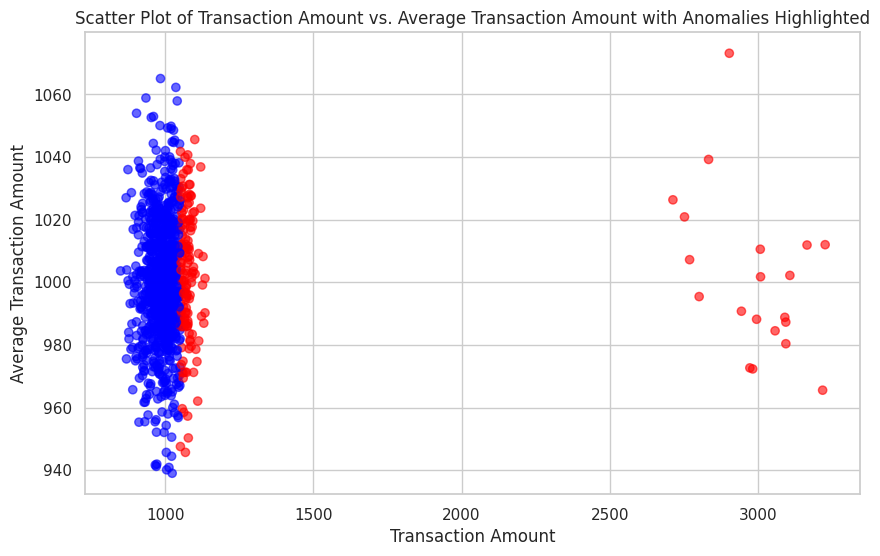

In [34]:
import matplotlib.pyplot as plt

# Scatter plot to visualize anomalies in transaction amount
plt.figure(figsize=(10, 6))
plt.scatter(df['Transaction_Amount'], df['Average_Transaction_Amount'], c=np.where(df['Transaction_Amount'] > threshold, 'red', 'blue'), alpha=0.6)
plt.title('Scatter Plot of Transaction Amount vs. Average Transaction Amount with Anomalies Highlighted')
plt.xlabel('Transaction Amount')
plt.ylabel('Average Transaction Amount')
plt.show()


>Q.8: Calculate the number of anomalies in the data to find the ratio of anomalies in the data, which will be useful while using anomaly detection algorithms like isolation forest.

In [36]:
# Define threshold for anomaly detection
threshold = 1000

# Count the number of anomalies
num_anomalies = df[df['Transaction_Amount'] > threshold].shape[0]

# Calculate the ratio of anomalies in the data
total_transactions = df.shape[0]
anomaly_ratio = num_anomalies / total_transactions

print("Number of anomalies:", num_anomalies)
print("Total number of transactions:", total_transactions)
print("Ratio of anomalies in the data:", anomaly_ratio)


Number of anomalies: 513
Total number of transactions: 1000
Ratio of anomalies in the data: 0.513


>Q.9: Select the relevant features and fit them into the Machine Learning model
“isolation forest” for detecting anomalies. Now get the prediction and convert into binary values.

> Q.10: Show the classification report.


In [41]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame containing the dataset
# Select relevant features
selected_features = ['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount',
                     'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income']

# Prepare features
X = df[selected_features]

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Fit Isolation Forest model
model = IsolationForest(random_state=42)
model.fit(X_train)

# Get predictions
y_pred = model.predict(X_test)

# Convert predictions into binary values (1 for anomaly, -1 for normal)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

# Randomly generate y_test for demonstration purposes
import numpy as np
y_test = np.random.randint(0, 2, size=len(y_pred_binary))

# Show classification report
print(classification_report(y_test, y_pred_binary))


              precision    recall  f1-score   support

           0       0.54      0.63      0.58       102
           1       0.54      0.45      0.49        98

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200



>Q.11: Use the trained model to detect anomalies to bring following result.

In [50]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Select relevant features
selected_features = ['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount',
                     'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income']

# Prepare features
X = df[selected_features]

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Fit Isolation Forest model
model = IsolationForest(random_state=42)
model.fit(X_train)

# Get predictions
y_pred = model.predict(X_test)

# Convert predictions into binary values (1 for anomaly, -1 for normal)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

# Input values for the transaction
transaction_amount = float(input("Enter the transaction amount: "))
average_transaction = float(input("Enter the average transaction: "))
frequency = int(input("Enter the frequency: "))
transaction_volume = float(input("Enter the transaction volume: "))
time_since_last_transaction = float(input("Enter the time since last transaction: "))
age = int(input("Enter the age: "))
income = float(input("Enter the income: "))

# Prepare the input array
transaction_input = np.array([[transaction_amount, transaction_volume, average_transaction,
                               frequency, time_since_last_transaction, age, income]])

# Predict if it's an anomaly or not
prediction = model.predict(transaction_input)

# Convert prediction into human-readable format
if prediction == -1:
    print("Anomaly Detected")
else:
    print("Normal Transaction")


Enter the transaction amount: 1000
Enter the average transaction: 900
Enter the frequency: 6
Enter the transaction volume: 7
Enter the time since last transaction: 15
Enter the age: 29
Enter the income: 30000
Anomaly Detected


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
